# Business Objectives
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who default cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 


Python version: 3.8.5
Numpy version : 1.19.2
Pandas version : 1.1.3
Seaborn version : 0.11.0

In [1]:
#Import necessary modules
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
pd.set_option('mode.chained_assignment', None)
dtype={'user_id': int}
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Load the dataset 
loan=pd.read_csv("dataset/loan.csv")

# Understanding the dataset

In [3]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


info() does not show any information due to too many columns. Need to find irrelevant columns to first remove them.

In [4]:
loan.shape

(39717, 111)

In [5]:
loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [6]:
loan.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

In [7]:
loan.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

From above result we see there are many columns which contain all NaNs.

In [8]:
loan.shape[0]/2

19858.5

# Probaby good to remove columns containing 80% or more NaNs. 

This shows many columns have completely null fields as loan.shape shows 39717 records and above many columns have 39717 null values.

In [9]:
print(loan.info(null_counts=True))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB
None


Info() does not provide enough information. Lets do some more analysis

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64


<AxesSubplot:ylabel='Count'>

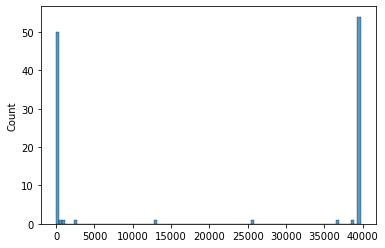

In [10]:
nans= loan.isnull().sum()
print(nans)
sns.histplot(x=loan.isnull().sum(), bins=100)

In [11]:
# More than 50 columns have almost all empty values.
# Good to drop columns containg 80% of NaNs (80% is considered as a guideline provided by in the mentor session)
min_percentage_nan_allowed = 20.00
min_valid_values_allowed =  int(((100-min_percentage_nan_allowed)/100)*loan.shape[0] + 1) #Calculate (100-min_percentage_nan_allowed)% of non-NaN values below which all columns wil be dropped
print(min_valid_values_allowed)

31774


In [12]:
# Drop all columns which have 80% of NaN values
loan_new = loan.dropna(axis=1,how='any', 
                thresh=min_valid_values_allowed)

In [13]:
#Let's look at new dataset.
loan_new.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 53 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   id                          39717 non-null  int64  
 1   member_id                   39717 non-null  int64  
 2   loan_amnt                   39717 non-null  int64  
 3   funded_amnt                 39717 non-null  int64  
 4   funded_amnt_inv             39717 non-null  float64
 5   term                        39717 non-null  object 
 6   int_rate                    39717 non-null  object 
 7   installment                 39717 non-null  float64
 8   grade                       39717 non-null  object 
 9   sub_grade                   39717 non-null  object 
 10  emp_title                   37258 non-null  object 
 11  emp_length                  38642 non-null  object 
 12  home_ownership              39717 non-null  object 
 13  annual_inc                  397

In [14]:
#Print columns containing all NaNs
for col in loan_new.columns:
  if loan_new.loc[:, col].isnull().sum() > min_valid_values_allowed:
    print("Column Name : " + col + " NaN Count " + str(loan_new.loc[:, col].isnull().sum()))

Great! - We have now columns only 80% of valid values .

In [15]:
loan_new.isnull().mean() * 100

id                            0.000000
member_id                     0.000000
loan_amnt                     0.000000
funded_amnt                   0.000000
funded_amnt_inv               0.000000
term                          0.000000
int_rate                      0.000000
installment                   0.000000
grade                         0.000000
sub_grade                     0.000000
emp_title                     6.191303
emp_length                    2.706650
home_ownership                0.000000
annual_inc                    0.000000
verification_status           0.000000
issue_d                       0.000000
loan_status                   0.000000
pymnt_plan                    0.000000
url                           0.000000
purpose                       0.000000
title                         0.027696
zip_code                      0.000000
addr_state                    0.000000
dti                           0.000000
delinq_2yrs                   0.000000
earliest_cr_line         

All columns with less than 10% of NaNs and we are left with 52 columns. So we complete the first step.

# Remove irrelevant columns

In [16]:
#Let's do some analysis of the remaining columns.
loan_new.nunique()

id                            39717
member_id                     39717
loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
url                           39717
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                    

# Analysis
Following columns can be removed for the reason given.

1. Not related/Demographic data - id, member_id,Title, zipcode,emp_title,addr_state,collection_recovery_fee,installment,out_prncp,url are not not related so can be dropped.
2. chargeoff_within_12_mths, collections_12_mths_ex_med,policy_code,acc_now_delinq, application_type,chargeoff_within_12_mths, delinq_amnt, tax_liens, initial_list_status,pymnt_plan also do not look relevant with all having same content(single value from above loan_new.nunique() code) so drop them
3. Columns are not related to information processed at the time - delinq_2yrs, earliest_cr_line, inq_last_6mths, open_acc, pub_rec, revol_bal, revol_util, total_acc, out_prncp, out_prncp_inv, total_pymnt, total_pymnt_inv, total_rec_prncp, total_rec_int, total_rec_late_fee, recoveries, collection_recovery_fee, last_pymnt_d, last_pymnt_amnt, last_credit_pull_d.

In [17]:
demographic_cols = ['id','member_id','title','zip_code','emp_title','addr_state','collection_recovery_fee','installment','out_prncp','url']
single_value_cols=['chargeoff_within_12_mths', 'collections_12_mths_ex_med','policy_code','acc_now_delinq', 'application_type','chargeoff_within_12_mths', 'delinq_amnt', 'tax_liens', 'initial_list_status','pymnt_plan']
post_loan_approval_cols = ['delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'issue_d', 'last_credit_pull_d', 'open_acc', 'pub_rec',
                           'pub_rec_bankruptcies', 'total_acc','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','revol_bal','revol_util','out_prncp_inv']
loan_new.drop(demographic_cols, axis=1, inplace=True)
loan_new.drop(single_value_cols, axis=1, inplace=True)
loan_new.drop(post_loan_approval_cols, axis=1, inplace=True)

In [18]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  object 
 4   int_rate             39717 non-null  object 
 5   grade                39717 non-null  object 
 6   sub_grade            39717 non-null  object 
 7   emp_length           38642 non-null  object 
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  dti                  39717 non-null  float64
dtypes: float64(3), int64(2), object(9)
memory usage: 4.2+ MB


Left with 13 columns. We can start next step of clean and standardization.

# Cleanup/Standardization of data
1. Map the categorical data to numerical values
2. Fill NaNs
3. Standardize column values as per other values.
4. Binning as required


In [19]:
loan_new.term.unique()

array([' 36 months', ' 60 months'], dtype=object)

Map loan term

In [20]:
loan_new.term = loan_new.term.map({' 36 months': 36, ' 60 months': 60})
loan_new.term.unique()

array([36, 60], dtype=int64)

In [21]:
loan_new.emp_length.unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

Map emp_length

In [22]:
def emp_length(x):
    if x == '10+ years':
        return 10
    elif x == '< 1 year':
        return 0
    elif x == '1 year':
        return 1
    elif x == '2 years':
        return 2
    elif x == '3 years':
        return 3
    elif x == '4 years':
        return 4
    elif x == '5 years':
        return 5
    elif x == '6 years':
        return 6
    elif x == '7 years':
        return 7
    elif x == '8 years':
        return 8
    elif x == '9 years':
        return 9

loan_new.emp_length = loan_new.emp_length.apply(emp_length)
loan_new.emp_length.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7., nan])

In [23]:
round(loan_new.emp_length.mean())

5

In [24]:
loan_new.emp_length.fillna(value=round(loan_new.emp_length.mean()), inplace=True)

<AxesSubplot:xlabel='emp_length', ylabel='Count'>

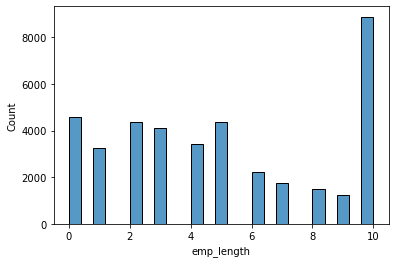

In [25]:
sns.histplot(loan_new.emp_length)

In [26]:
loan_new.term.unique()

array([36, 60], dtype=int64)

In [27]:
loan_new.int_rate.unique()

array(['10.65%', '15.27%', '15.96%', '13.49%', '12.69%', '7.90%',
       '18.64%', '21.28%', '14.65%', '9.91%', '16.29%', '6.03%', '11.71%',
       '12.42%', '14.27%', '16.77%', '7.51%', '8.90%', '18.25%', '6.62%',
       '19.91%', '17.27%', '17.58%', '21.67%', '19.42%', '22.06%',
       '20.89%', '20.30%', '23.91%', '19.03%', '23.52%', '23.13%',
       '22.74%', '22.35%', '24.11%', '6.00%', '22.11%', '7.49%', '11.99%',
       '5.99%', '10.99%', '9.99%', '18.79%', '11.49%', '8.49%', '15.99%',
       '16.49%', '6.99%', '12.99%', '15.23%', '14.79%', '5.42%', '10.59%',
       '17.49%', '15.62%', '21.36%', '19.29%', '13.99%', '18.39%',
       '16.89%', '17.99%', '20.62%', '20.99%', '22.85%', '19.69%',
       '20.25%', '23.22%', '21.74%', '22.48%', '23.59%', '12.62%',
       '18.07%', '11.63%', '7.91%', '7.42%', '11.14%', '20.20%', '12.12%',
       '19.39%', '16.11%', '17.54%', '22.64%', '13.84%', '16.59%',
       '17.19%', '12.87%', '20.69%', '9.67%', '21.82%', '19.79%',
       '18.49%', '

Remove '%'

In [28]:
loan_new.int_rate= loan_new.int_rate.map(lambda x: str(x).rstrip('%'))

In [29]:
loan_new.int_rate.unique()

array(['10.65', '15.27', '15.96', '13.49', '12.69', '7.90', '18.64',
       '21.28', '14.65', '9.91', '16.29', '6.03', '11.71', '12.42',
       '14.27', '16.77', '7.51', '8.90', '18.25', '6.62', '19.91',
       '17.27', '17.58', '21.67', '19.42', '22.06', '20.89', '20.30',
       '23.91', '19.03', '23.52', '23.13', '22.74', '22.35', '24.11',
       '6.00', '22.11', '7.49', '11.99', '5.99', '10.99', '9.99', '18.79',
       '11.49', '8.49', '15.99', '16.49', '6.99', '12.99', '15.23',
       '14.79', '5.42', '10.59', '17.49', '15.62', '21.36', '19.29',
       '13.99', '18.39', '16.89', '17.99', '20.62', '20.99', '22.85',
       '19.69', '20.25', '23.22', '21.74', '22.48', '23.59', '12.62',
       '18.07', '11.63', '7.91', '7.42', '11.14', '20.20', '12.12',
       '19.39', '16.11', '17.54', '22.64', '13.84', '16.59', '17.19',
       '12.87', '20.69', '9.67', '21.82', '19.79', '18.49', '22.94',
       '24.59', '24.40', '21.48', '14.82', '14.17', '7.29', '17.88',
       '20.11', '16.02', '17

In [30]:
loan_new.int_rate = loan_new.int_rate.astype("float64")

In [31]:
print(loan_new.grade.unique())
print(loan_new.sub_grade.unique())

['B' 'C' 'A' 'E' 'F' 'D' 'G']
['B2' 'C4' 'C5' 'C1' 'B5' 'A4' 'E1' 'F2' 'C3' 'B1' 'D1' 'A1' 'B3' 'B4'
 'C2' 'D2' 'A3' 'A5' 'D5' 'A2' 'E4' 'D3' 'D4' 'F3' 'E3' 'F4' 'F1' 'E5'
 'G4' 'E2' 'G3' 'G2' 'G1' 'F5' 'G5']


Map Grade

In [32]:
loan_new['grade'] = loan_new.grade.map({'A': 0,'B': 1,'C': 2,'D': 3,'E': 4,'F': 5,'G': 6})
print(loan_new.grade.unique())

[1 2 0 4 5 3 6]


Map Sub Grade

In [33]:
loan_new['sub_grade'] = loan_new.sub_grade.map({'B2':0, 'C4':1, 'C5':2, 'C1':3,
                                             'B5':4, 'A4':5, 'E1':6, 'F2':7,
                                             'C3':8, 'B1':9,   'D1':10, 'A1':11, 'B3':12, 'B4':13,
                                             'C2':14, 'D2':15, 'A3':16, 'A5':17, 'D5':18, 'A2':19,
                                             'E4':20, 'D3':21, 'D4':22, 'F3':23, 'E3':24, 'F4':25, 'F1':26, 'E5':27,
                                             'G4':28, 'E2':29, 'G3':30, 'G2':31, 'G1':32, 'F5':33, 'G5':34})
print(loan_new.sub_grade.unique())

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34]


In [34]:
loan_new.purpose.unique()

array(['credit_card', 'car', 'small_business', 'other', 'wedding',
       'debt_consolidation', 'home_improvement', 'major_purchase',
       'medical', 'moving', 'vacation', 'house', 'renewable_energy',
       'educational'], dtype=object)

In [35]:
#loan_new['purpose'] = loan_new.purpose.map({'credit_card': 0,'car': 1,'small_business': 2,'other': 3,'wedding': 4,
                                     #'debt_consolidation': 5,'home_improvement': 6,
                                     #'major_purchase': 7,'medical': 8,'moving': 9,
                                     #'vacation': 10,'house': 11,
                                     #'renewable_energy': 12,'educational': 13})

In [36]:
#loan_new.purpose.unique()

In [37]:
loan_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [38]:
loan_new.loan_status.unique()

array(['Fully Paid', 'Charged Off', 'Current'], dtype=object)

In [39]:
loan_new.int_rate.describe()

count    39717.000000
mean        12.021177
std          3.724825
min          5.420000
25%          9.250000
50%         11.860000
75%         14.590000
max         24.590000
Name: int_rate, dtype: float64

Map interest rate

In [40]:
def int_rate_slab(int_rate) :    
    if int_rate >= 20 :
        return 0
    elif (int_rate >= 15):
        return 1
    elif (int_rate >= 10):
        return 2
    elif (int_rate >= 5):
        return 3

loan_new["int_rate"] = loan_new.int_rate.apply(int_rate_slab)
loan_new["int_rate"].unique()

array([2, 1, 3, 0], dtype=int64)

In [41]:
loan_new.dti.unique()

array([27.65,  1.  ,  8.72, ...,  1.79,  0.12, 25.43])

In [42]:
def dti_slab(dti) :
    
    if dti >= 25 :
        return 0
    elif dti >= 20 :
        return 1
    elif (dti >= 15):
        return 2
    elif (dti >= 10):
        return 3
    elif (dti >= 5):
        return 4

loan_new["dti"] = loan_new.dti.apply(dti_slab)
loan_new.dti.unique()

array([ 0., nan,  4.,  1.,  2.,  3.])

In [43]:
loan_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            39717 non-null  int64  
 1   funded_amnt          39717 non-null  int64  
 2   funded_amnt_inv      39717 non-null  float64
 3   term                 39717 non-null  int64  
 4   int_rate             39717 non-null  int64  
 5   grade                39717 non-null  int64  
 6   sub_grade            39717 non-null  int64  
 7   emp_length           39717 non-null  float64
 8   home_ownership       39717 non-null  object 
 9   annual_inc           39717 non-null  float64
 10  verification_status  39717 non-null  object 
 11  loan_status          39717 non-null  object 
 12  purpose              39717 non-null  object 
 13  dti                  34577 non-null  float64
dtypes: float64(4), int64(6), object(4)
memory usage: 4.2+ MB


We have now mapped all NaNs and few categorical data to numerical.

# EDA
Considering the Objective of the case study provided in the upgrad learning module:

Applicant has following load states:

Loan accepted: If the company approves the loan, there are 3 possible scenarios described below:

Fully paid: Applicant has fully paid the loan (the principal and the interest rate)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These    
candidates are not labelled as 'defaulted'.

Charged-off: Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

From the description we need to consider loan_status as target variable.

# Univariate Analysis
Cleanup step 1: Find outliers

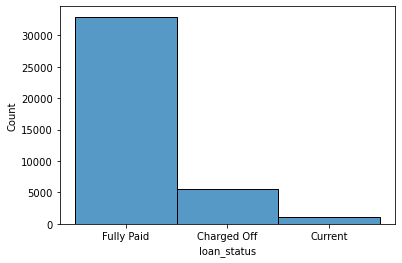

In [44]:
#Check how the target variable "loan_status" distribution looks like.
sns.histplot(x="loan_status", data=loan_new, palette="bwr")
plt.show()

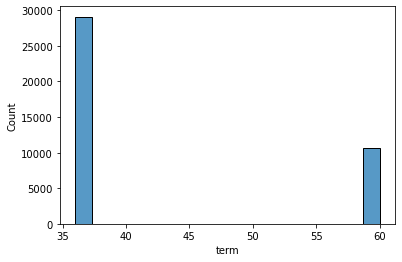

In [45]:
#Check how the "term" variable distribution looks like.
sns.histplot(x="term", data=loan_new, palette="bwr")
plt.show()

<AxesSubplot:ylabel='loan_amnt'>

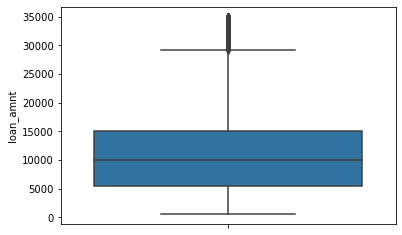

In [46]:
sns.boxplot(y=loan_new.loan_amnt)

loan_amnt has outliers but overall looks good and no need to process outliers

<AxesSubplot:ylabel='int_rate'>

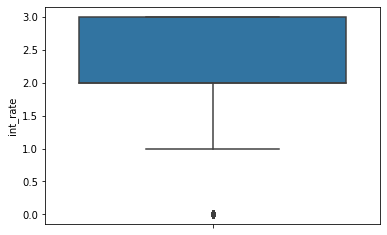

In [47]:
sns.boxplot(y=loan_new.int_rate)

int_rate has outliers but overall looks good and no need to process outliers

<AxesSubplot:ylabel='term'>

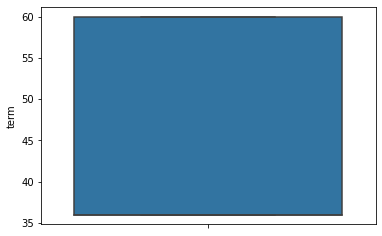

In [48]:
sns.boxplot(y=loan_new.term)

Since term has only 2 values it does not make sense to analyse term hence the boxplot does not show properly.

<AxesSubplot:ylabel='emp_length'>

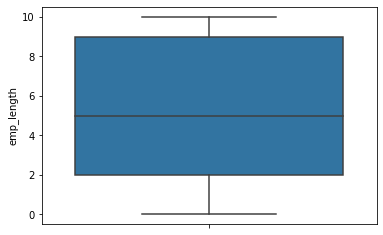

In [49]:
sns.boxplot(y=loan_new.emp_length)

emp_length also looks good.

<AxesSubplot:ylabel='dti'>

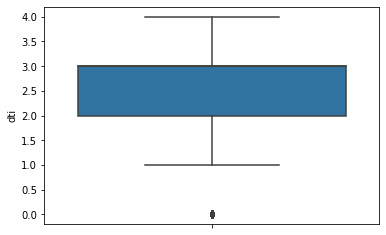

In [50]:
sns.boxplot(y=loan_new.dti)

dti also looks good.

In [51]:
loan_new.dti.nunique()

5

<AxesSubplot:ylabel='annual_inc'>

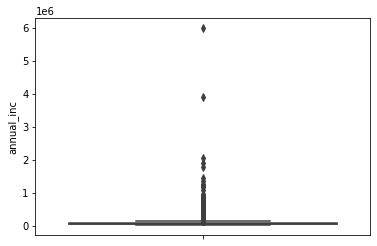

In [52]:
sns.boxplot(y=loan_new.annual_inc)

Aannual income does not look good from outlier point of view. This has outliers.
But as per instructions in lending group case study mentor session we
are only supposed to mention outlier presence and no need to remove them.

# Bivariate Analysis
Since loan_status(target variable) is a categorical variable so lets use following plots for analysis:
1. Boxplot - used for category-continuous variable analysis
2. Barplot - used for category-continuous variable analysis
3. countplots - used for category-category or category-continuous variable analysis
4. catplot - used for category-category variable analysis

1. Analyze Interest Rate

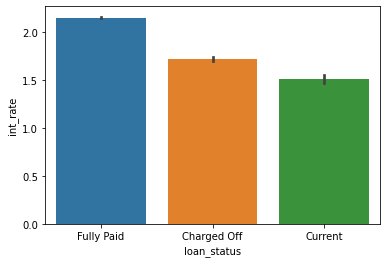

In [53]:
sns.barplot(y=loan_new.int_rate, x=loan_new.loan_status)
plt.show()

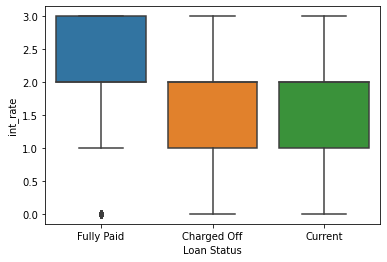

In [54]:
sns.boxplot(x=loan_new.loan_status,y=loan_new.int_rate,data=loan_new)
plt.xlabel('Loan Status')
plt.show()


In [55]:
loan_new.groupby(['loan_status'])['int_rate'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,5627.0,1.717967,0.769279,0.0,1.0,2.0,2.0,3.0
1,Current,1140.0,1.507895,0.748970,0.0,1.0,2.0,2.0,3.0
2,Fully Paid,32950.0,2.148346,0.736465,0.0,2.0,2.0,3.0,3.0


Analysis - This shows that interest rate between 14% and 17% tend to be defaulters.

2. Loan Amount Analysis

<AxesSubplot:xlabel='loan_status', ylabel='count'>

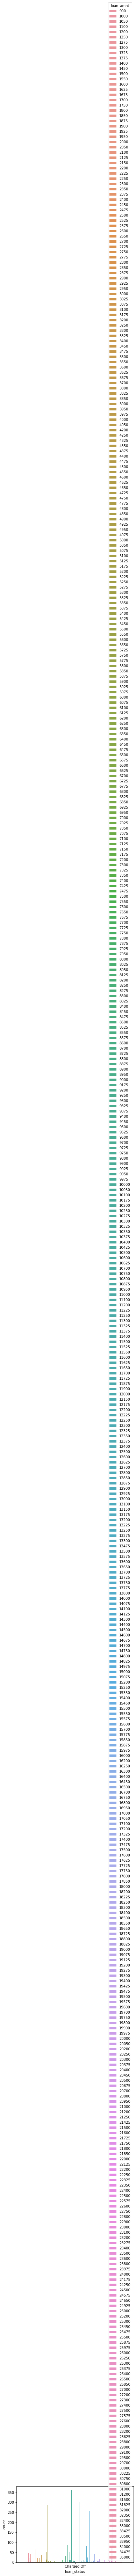

In [56]:
sns.countplot(x='loan_status',hue='loan_amnt',data=loan_new[loan_new.loan_status == 'Charged Off'])

With so many descrete values of loan_amnt analysis will not give good results. Lets break loan_amnt into slabs.

In [57]:
loan_new.loan_amnt.describe()

count    39717.000000
mean     11219.443815
std       7456.670694
min        500.000000
25%       5500.000000
50%      10000.000000
75%      15000.000000
max      35000.000000
Name: loan_amnt, dtype: float64

In [58]:
def loan_amnt_slab(loan_amnt) :    
    if loan_amnt >= 35000 :
        return 0
    elif loan_amnt >= 30000 :
        return 1
    elif loan_amnt >= 25000 :
        return 2
    elif loan_amnt >= 20000 :
        return 3
    elif loan_amnt >= 15000:
        return 4
    elif loan_amnt >= 10000 :
        return 5
    elif loan_amnt >= 5000 :
        return 6
    elif loan_amnt >= 500:
        return 7

loan_new["loan_amnt"] = loan_new.loan_amnt.apply(loan_amnt_slab)

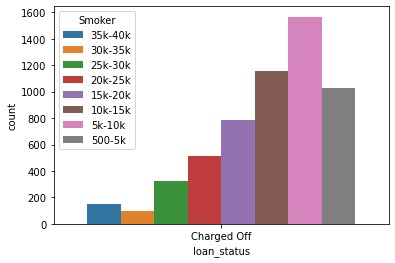

In [59]:
sns.countplot(x='loan_status',hue='loan_amnt',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(title='Smoker', loc='upper left', labels=['35k-40k','30k-35k','25k-30k','20k-25k','15k-20k','10k-15k','5k-10k','500-5k'])
plt.show()

Analysis - Loan amounts betwen 15000 and 16500 show the trend for defaulters

3. Loan Tenure Analysis

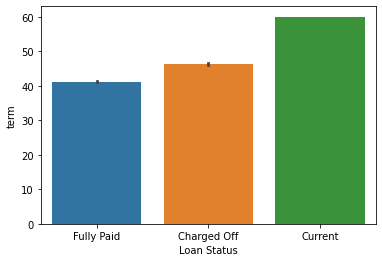

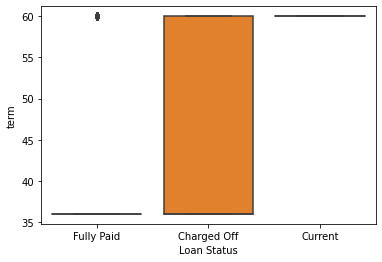

In [60]:
sns.barplot(y=loan_new.term, x=loan_new.loan_status)
plt.xlabel('Loan Status')
plt.show()
sns.boxplot(x=loan_new.loan_status,y=loan_new.term)
plt.xlabel('Loan Status')
plt.show()


barplot and boxplot did not provide much correlated information as term is just only 2 categories. Try countplot if it provides any insight.

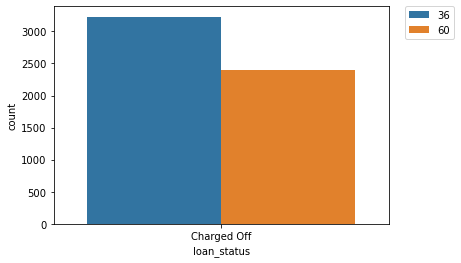

In [61]:
sns.countplot(x='loan_status',hue='term',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

Analysis - countplot helps in this case to show loan tenures of 36 months tend to default more. Which also can be related to purpose which we can analyze next

4. Loan Grade Analysis

([<matplotlib.axis.XTick at 0x2a0850a4fa0>,
 [Text(0, 0, 'A'),
  Text(1, 0, 'B'),
  Text(2, 0, 'C'),
  Text(3, 0, 'D'),
  Text(4, 0, 'E'),
  Text(5, 0, 'F'),
  Text(6, 0, 'G')])

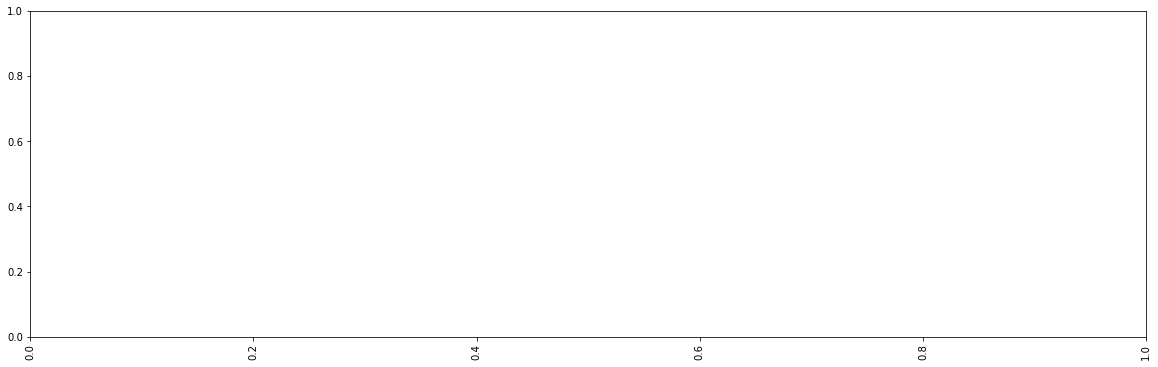

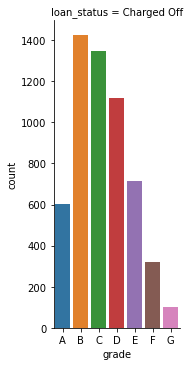

In [62]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
fig= sns.catplot(x="grade",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=0.5)
#plt.xticks(rotation=90)
labels = ['A','B','C','D','E','F','G']
plt.xticks([0,1,2,3,4,5,6], labels)

Analysis - Grade B loans are probable to default

6. Sub Grade Analysis

Text(0.5, 0, 'Loan Status')

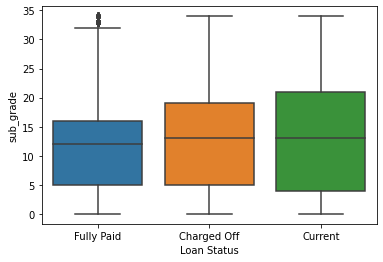

In [63]:
sns.boxplot(x=loan_new.loan_status, y=loan_new.sub_grade)
plt.xlabel('Loan Status')

In [64]:
loan_new.groupby(['loan_status'])['sub_grade'].describe().reset_index()

,loan_status,count,mean,std,min,25%,50%,75%,max
0,Charged Off,5627.0,12.740714,8.487739,0.0,5.0,13.0,19.0,34.0
1,Current,1140.0,13.262281,8.696350,0.0,4.0,13.0,21.0,34.0
2,Fully Paid,32950.0,11.253566,7.201181,0.0,5.0,12.0,16.0,34.0


This shows result that sub_grade 16('A3'), 17('A5'), 18('D5'), 19('A2') tend to be defaulters.

7. Home Ownerhip Analysis

(array([0, 1, 2, 3]),
 [Text(0, 0, 'RENT'),
  Text(1, 0, 'OWN'),
  Text(2, 0, 'MORTGAGE'),
  Text(3, 0, 'OTHER')])

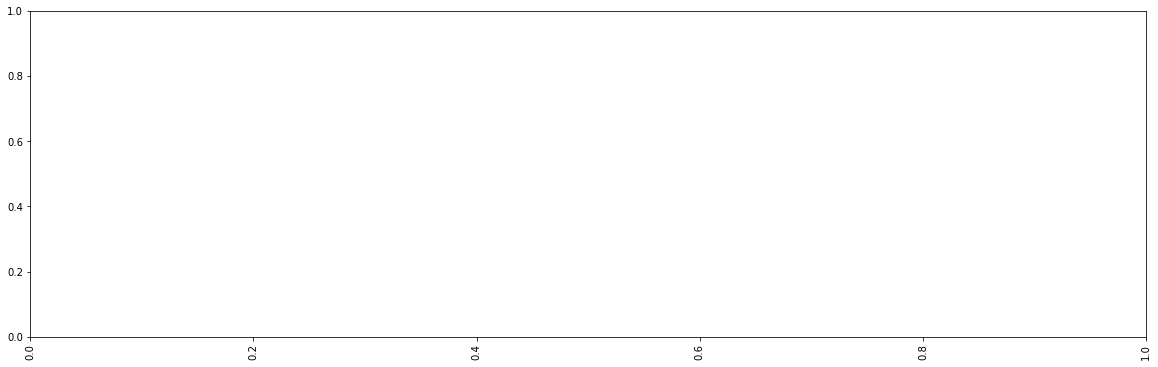

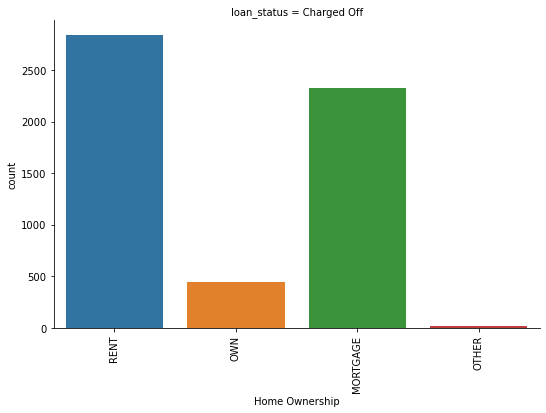

In [65]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.catplot(x="home_ownership",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=1.5)
plt.xlabel('Home Ownership')
plt.xticks(rotation=90)

People on RENT are risky for defaulters

8. Verification Status

(array([0, 1, 2]),
 [Text(0, 0, 'Source Verified'),
  Text(1, 0, 'Verified'),
  Text(2, 0, 'Not Verified')])

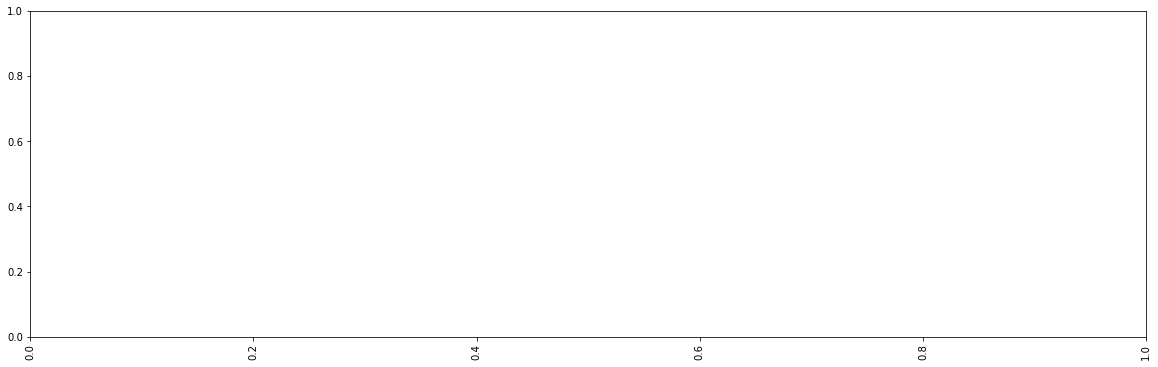

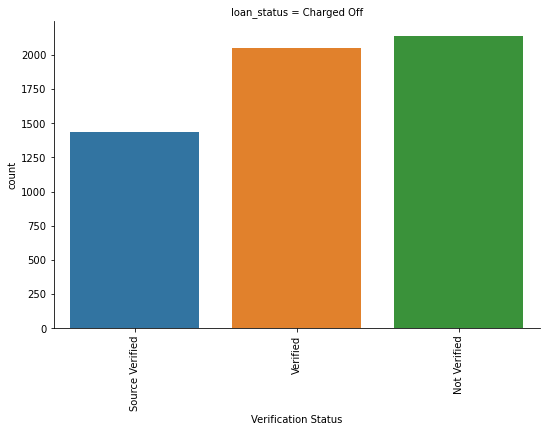

In [66]:
plt.figure(figsize=(20,6))
#sns.barplot(x=loan_new.loan_status,y=loan_new.verification_status)
plt.xticks(rotation=90)
sns.catplot(x="verification_status",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=1.5)
plt.xlabel('Verification Status')
plt.xticks(rotation=90)

Analysis - Verification status as "Not Verified" have some chance to default.

9. Employement Length Analysis

Text(0.5, 0, 'Loan Status')

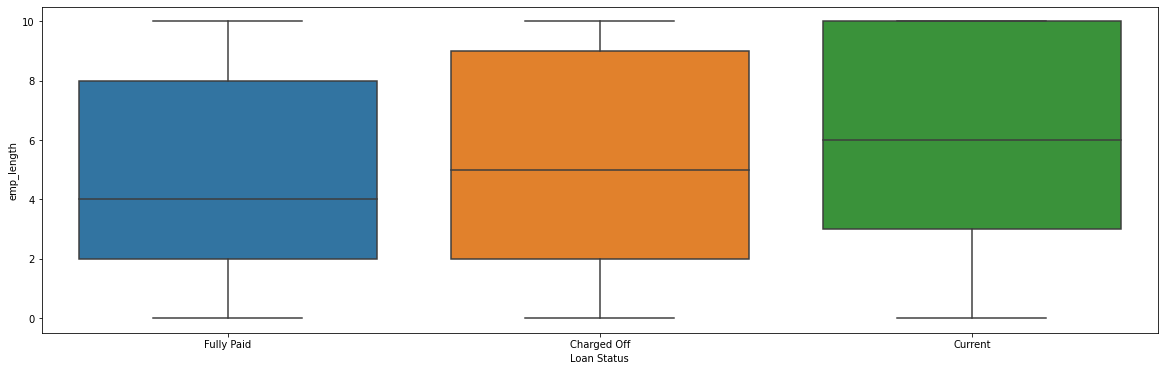

In [67]:
plt.figure(figsize=(20,6))
sns.boxplot(x=loan_new.loan_status, y=loan_new.emp_length)
plt.xlabel('Loan Status')

emp_length also does not show much variable in quantiles betwen Fully Paid and Charged Off. So cannot conclude much from boxplot of emp_length. Let's do more analysis.

In [68]:
loan_new.emp_length.unique()

array([10.,  0.,  1.,  3.,  8.,  9.,  4.,  5.,  6.,  2.,  7.])

Text(0.5, 6.79999999999999, 'Employment Length')

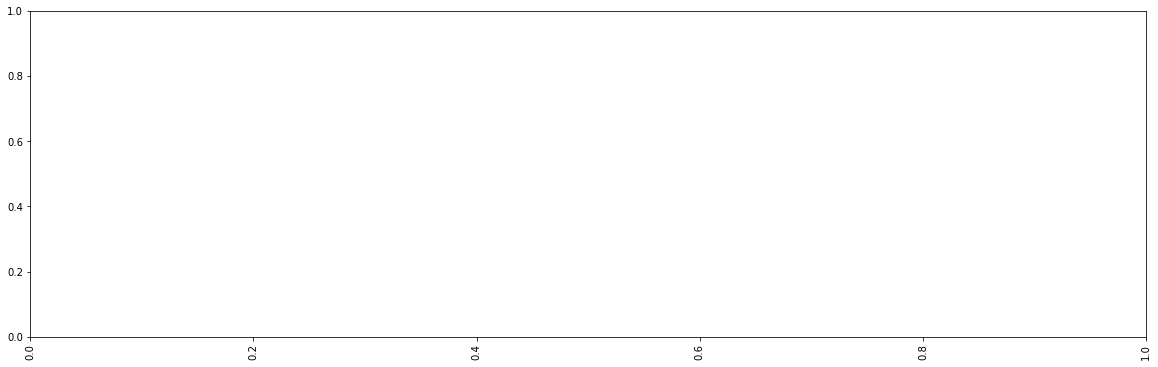

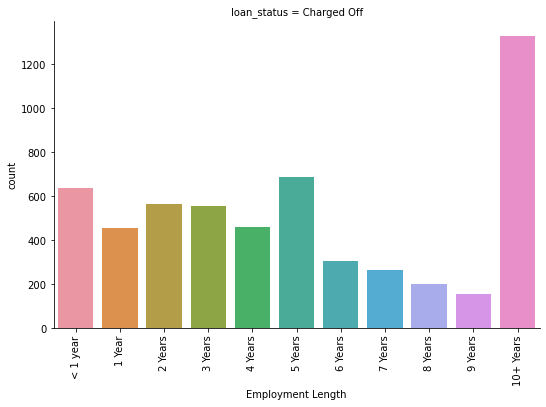

In [69]:
plt.figure(figsize=(20,6))
#sns.barplot(x=loan_new.loan_status,y=loan_new.verification_status)
plt.xticks(rotation=90)
sns.catplot(x="emp_length",
            col='loan_status',            
            kind="count", data=loan_new[loan_new.loan_status == 'Charged Off'],
            aspect=1.5)
plt.xticks(rotation=90)
labels = ['10+ Years','< 1 year','1 Year','2 Years','3 Years','4 Years','5 Years','6 Years','7 Years','8 Years','9 Years']
plt.xticks([10.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0], labels)
plt.xlabel('Employment Length')

Analysis - Employement length > 10 is risky.

10. Analyze DTI 

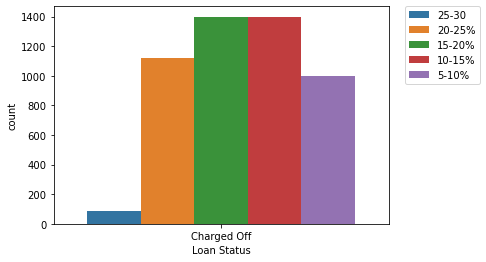

In [70]:
sns.countplot(x='loan_status',hue='dti',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,labels=['25-30','20-25%','15-20%','10-15%','5-10%'])
plt.xlabel('Loan Status')
plt.show()

Analysis - DTI in range of 10 and 20 is little risky

# Trivariate Analysis
Following parameters in combination might give more insight for Loan Status.
1. Combination of Verification Status, Home Ownership and Loan Status.
2. Loan Amount and Home Ownership and Loan Status.
3. Interest Rate and Home Ownership and Loan Status.
4. Loan amount and Interest and Loan Status.
5. Loan Tenure and Purpose.

Let's start the analysis
1. Combination of Verification Status, Home Ownership and Loan Status.

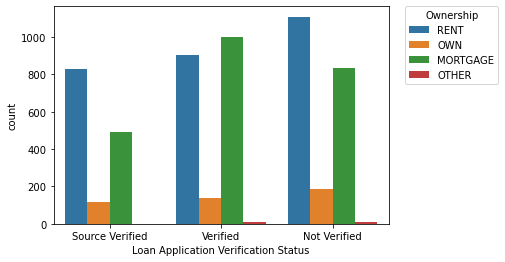

In [71]:
sns.countplot(x='verification_status',hue='home_ownership',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Ownership")
plt.xlabel('Loan Application Verification Status')
plt.show()

Analysis - Not Verified with house ownership as RENTED is not good.

2. Loan Amount and Home Ownership and Loan Status.

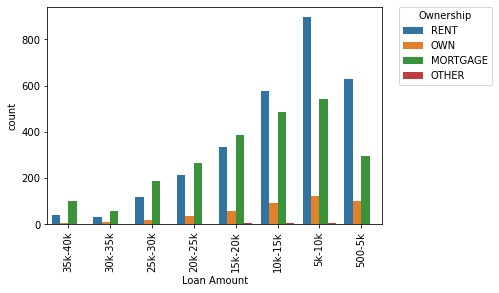

In [72]:
sns.countplot(x='loan_amnt',hue='home_ownership',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Ownership")
labels=['35k-40k','30k-35k','25k-30k','20k-25k','15k-20k','10k-15k','5k-10k','500-5k']
plt.xticks(rotation=90)
plt.xticks([0,1,2,3,4,5,6,7], labels)
plt.xlabel('Loan Amount')
plt.show()

Analysis - Loan Amount between 5000-10000 taken when house ownership is RENT is a risky loan

3. Interest Rate and Home Ownership and Loan Status.

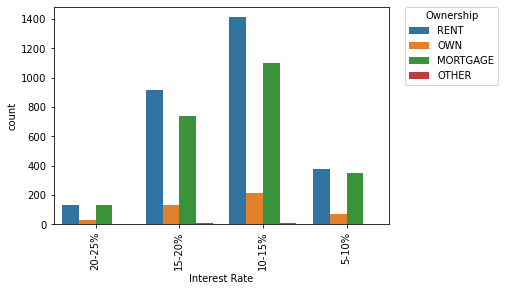

In [73]:
sns.countplot(x='int_rate',hue='home_ownership',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Ownership")
labels=['20-25%','15-20%','10-15%','5-10%']
plt.xticks(rotation=90)
plt.xticks([0,1,2,3], labels)
plt.xlabel('Interest Rate')
plt.show()

Analysis - House ownership as RENT taking loan with interest rate between 10-15% can cause default loans.

4. Loan amount and Interest and Loan Status.

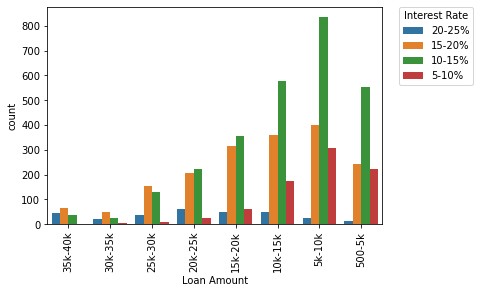

In [74]:
sns.countplot(x='loan_amnt',hue='int_rate',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,labels=['20-25%','15-20%','10-15%','5-10%'],title="Interest Rate")
labels=['35k-40k','30k-35k','25k-30k','20k-25k','15k-20k','10k-15k','5k-10k','500-5k']
plt.xticks(rotation=90)
plt.xticks([0,1,2,3,4,5,6,7], labels)
plt.xlabel('Loan Amount')
plt.show()

Analysis - Loans of 5-10k amount and interest rate between 10-15% can cause default loans.

5. Purpose and Loan Tenure Analysis

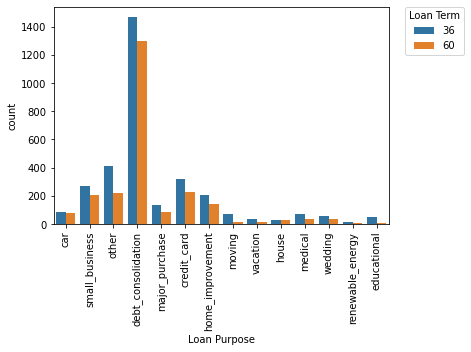

In [75]:
sns.countplot(x='purpose',hue='term',data=loan_new[loan_new.loan_status == 'Charged Off'])
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0,title="Loan Term")
plt.xticks(rotation=90)
plt.xlabel('Loan Purpose')
plt.show()

Analysis - People taking 36 months loan for debt_consolidation are defaulters.

# Summary - Bivariate Analysis
1. Interest rate between 14% and 17% tend to be defaulters.
2. Loan amounts betwen 5k and 10k show the trend for defaulters
3. Loan tenures of 36 months tend to default more.
4. Grade B loans are probable to default
5. Sub grades A3,A5,D5,A2 tend to be defaulters.
6. People on RENT are risky for defaulters
7. Verification status as "Not Verified" have some chance to default.
8. DTI in range of 10 and 20 is little risky

# Summary - Multivariate Analysis
1. 'Not Verified' with house ownership as RENTED is not good.
2. Loan Amount between 5k-10k taken when house ownership is RENT is a risky loan.
3. House ownership as RENT taking loan with interest rate between 10-15% can cause default loans.
4. People taking 36 months loan for debt_consolidation are defaulters.
5. Loans of 5-10k amount and interest rate between 10-15% can cause default loans.

# Recommendation


1. House ownership being RENTED should be verified properly.
2. House ownership being RENT and loan amount 5-10k also should be consider carefully.
3. Loan tenures of 36 months and the type of the loan taken for should be well scrutinized.
4. Grade B loans need good verification.
5. DTI in range 10-20 should be well scrutinized.
6. LC should ensure all appliocant status are "Verified".